In [2]:
# Upload data and preview rows
import pandas as pd

df = pd.read_csv("SGISD_Project_Data_Main.csv")
df.head()

,ID,First_Name,Last_Name,Date_Inquired,Email_Address,Program,Degree,Country,State,City
0,1,Courtney,Lynch,3/2/2020,Courtneylynch222@gmail.com,GISD,MA,USA,MA,Medford
1,2,Meghan,Kmetz,3/3/2020,maggie.kmetz@gmail.com,GISD,PhD,NaN,NaN,NaN
2,3,Jennifer,Castro,3/4/2020,sfleming@naba-vision.org,GISD,PhD,USA,RI,Providence
3,4,Limari,Colon,3/6/2020,correoparalimari@gmail.com,GISD,PhD,PR,PR,Trujillo Alto
4,5,Keith,Marion,3/7/2020,keith_marion2002@yahoo.com,GISD,MA / PhD,USA,MA,Dorchester


In [3]:
# Quick summary of data structure and column types
df.info()
df.describe(include='all')

# include='all' tells describe() to include all columns not just numerical ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1116 non-null   int64 
 1   First_Name     1116 non-null   object
 2   Last_Name      1115 non-null   object
 3   Date_Inquired  1116 non-null   object
 4   Email_Address  1116 non-null   object
 5   Program        1113 non-null   object
 6   Degree         1109 non-null   object
 7   Country        879 non-null    object
 8   State          781 non-null    object
 9   City           793 non-null    object
dtypes: int64(1), object(9)
memory usage: 87.3+ KB


,ID,First_Name,Last_Name,Date_Inquired,Email_Address,Program,Degree,Country,State,City
count,1116.000000,1116,1115,1116,1116,1113,1109,879,781,793
unique,NaN,684,753,451,811,6,13,66,133,421
top,NaN,Stephanie,Cooper,7/1/2020,aaronpcooper@gmail.com,GISD,PhD,USA,MA,Boston
freq,NaN,8,8,19,6,536,527,695,231,31
mean,558.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,322.305755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,279.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,558.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,837.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create a backup of the dataframe
df_backup = df.copy()

In [5]:
# Remove unnecessary columnc ('First_Name', 'Last_Name', 'Email_Address')
df.drop(['First_Name', 'Last_Name', 'Email_Address'], axis=1, inplace=True)
df

# axis=1 specifies to drop columns and not rows
# inplace=True will remove the columns from original dataframe

,ID,Date_Inquired,Program,Degree,Country,State,City
0,1,3/2/2020,GISD,MA,USA,MA,Medford
1,2,3/3/2020,GISD,PhD,NaN,NaN,NaN
2,3,3/4/2020,GISD,PhD,USA,RI,Providence
3,4,3/6/2020,GISD,PhD,PR,PR,Trujillo Alto
4,5,3/7/2020,GISD,MA / PhD,USA,MA,Dorchester
...,...,...,...,...,...,...,...
1111,1112,10/4/2020,GISD,PhD,NaN,NaN,NaN
1112,1113,9/28/2020,GISD,PhD,NaN,NaN,NaN
1113,1114,9/28/2020,GISD,PhD,USA,TX,College Station
1114,1115,9/29/2020,GISD,PhD,USA,CT,Fairfield


In [6]:
# Check for missing values
df.isnull().sum()

# Currently, 'Program' has 3 missing values
# 'Degree' has 7 missing columns
# 'Country' has 237 missing values
# 'State' has 335 missing values
# 'City' has 323 missing values

ID                 0
Date_Inquired      0
Program            3
Degree             7
Country          237
State            335
City             323
dtype: int64

In [10]:
# Drop rows with missing values from critical columns like Program
df.dropna(subset=['Program'], inplace=True)


In [11]:
# Remove incorrectly formatted row number 869
df.drop(index=869, inplace=True)

In [12]:
# Fill rows with missing values in 'City' column with unknown
df['City'] = df['City'].fillna('Unknown')

In [13]:
# Fill rows with missing values in 'Country' and 'State' to 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

In [14]:
# Create new updated backup
df_newbackup = df.copy()

In [15]:
# Convert 'Date_Inquired' to datetime
df['Date_Inquired'] = pd.to_datetime(df['Date_Inquired'], errors='coerce')

# errors='coerce' parameter tells pandas to handle invalid date entries to NaT (Not a Time) instead of raising an error
# without errors='coerce', the conversion would raise an error if it encounters an invalid date format

In [18]:
# Categorize text data
# Convert categorical columns into category data types
# This helps with efficiency and easier analysis
# Convert 'Program', 'Degree', 'Country', 'State'
df['Program'] = df['Program'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Country'] = df['Country'].astype('category')
df['State'] = df['State'].astype('category')

In [20]:
# Begin to transform the data
# Create a 'Year_Inquired' and 'Month_Inquired' column by extracting them from 'Date_Inquired' column
df['Year_Inquired'] = df['Date_Inquired'].dt.year
df['Month_Inquired'] = df['Date_Inquired'].dt.month

In [21]:
# Drop rows with missing values from 'Degree'
df.dropna(subset=['Degree'], inplace=True)

In [23]:
# Normalize data
# Standardize text cases to avoid inconsistencies
# Lowercase all text entries for 'Program'
# Uppercase all text entreis for 'Degree'
df['Program'] = df['Program'].str.lower()
df['Degree'] = df['Degree'].str.upper()

In [24]:
# Make sure all IDs are unique by checking for duplicates
if df['ID'].duplicated().any():
    df.drop_duplicates(subset=['ID'])
    
# any() checks for True, or duplicates in the series

In [ ]:
# Check unqiue values in the categorical columns: 'Degree'
df['Degree'].value_counts()

# There are three MA unique values, maybe one has a space after it
# There are two PHD unique values, maybe one has a space after it
# Also, convert PHD/MA values to MA/PHD
# Also, convert MA / PHD values to MA/PHD

Degree
PHD               528
MA                172
MA                158
CERTIFICATE        91
HR CERTIFICATE     85
MA/PHD             63
PHD/MA              4
PHD                 3
MA / PHD            2
MA                  1
Name: count, dtype: int64

In [26]:
# Strip extra whitespace from 'Degree' values
df['Degree'] = df['Degree'].str.strip()

In [28]:
# Standardize specific values
# convert 'PHD/MA' to 'MA/PHD'
# convert 'MA / PHD' to MA/PHD'
df['Degree'] = df['Degree'].replace({
    'PHD/MA': 'MA/PHD',
    'MA / PHD': 'MA/PHD'
})

In [ ]:
# Check again for unique values in 'Degree' column
df['Degree'].value_counts()

# Looks good

Degree
PHD               531
MA                331
CERTIFICATE        91
HR CERTIFICATE     85
MA/PHD             69
Name: count, dtype: int64

In [ ]:
# Check unqiue values in the categorical columns: 'Program'
df['Program'].value_counts()

# There are two 'gisd' unique value columns, so remove whitespace

Program
gisd                            534
gisd                            371
rehab counseling (ms)           110
rehab counseling certificate     92
Name: count, dtype: int64

In [31]:
# Strip extra whitespace from 'Program' column
df['Program'] = df['Program'].str.strip()

In [ ]:
# Check again for unique values in 'Program' column
df['Program'].value_counts()

# Looks good

Program
gisd                            905
rehab counseling (ms)           110
rehab counseling certificate     92
Name: count, dtype: int64

In [33]:
# Check the date range for the data
print(df['Date_Inquired'].min(), df['Date_Inquired'].max())

2020-03-02 00:00:00 2021-12-10 00:00:00


In [ ]:
# Descriptive statistics and Summary statistics
# Use describe() to get an overview of numeric columns
df.describe()

# Not very useful since most numerical columns are either a date or ID

,ID,Date_Inquired,Year_Inquired,Month_Inquired
count,1107.000000,1107,1107.000000,1107.000000
mean,557.782294,2020-12-01 05:05:41.463414784,2020.405601,6.685637
min,1.000000,2020-03-02 00:00:00,2020.000000,1.000000
25%,279.500000,2020-06-29 00:00:00,2020.000000,5.000000
50%,557.000000,2020-10-03 00:00:00,2020.000000,7.000000
75%,835.500000,2021-05-11 00:00:00,2021.000000,9.000000
max,1116.000000,2021-12-10 00:00:00,2021.000000,12.000000
std,322.694651,NaN,0.491230,2.781462


In [ ]:
# Categorical summaries
# For categorical columns like 'Program' and 'Degree' use value_counts() to see frequency of each value
print(df['Degree'].value_counts())
print('')
print(df['Program'].value_counts())

# Most common Degree is PHD with MA in second
# Most common program is gisd by a lot

Degree
PHD               531
MA                331
CERTIFICATE        91
HR CERTIFICATE     85
MA/PHD             69
Name: count, dtype: int64

Program
gisd                            905
rehab counseling (ms)           110
rehab counseling certificate     92
Name: count, dtype: int64


In [ ]:
# Find which countries are most common
df['Country'].value_counts()

# Large majority comes from USA

Country
USA              694
Unknown          233
India             23
Nigeria           14
Ghana              7
                ... 
Greece             1
Guam               1
Myanmar/Burma      1
Jamaica            1
Kuwait             1
Name: count, Length: 66, dtype: int64

In [ ]:
# Find which states are most common
df['State'].value_counts()

# Lots of unknown states but after that the most common was MA (Massachusetts)
# Then CA, TX, and NY which all are large states

State
Unknown      328
MA           231
CA            33
TX            30
NY            27
            ... 
Kentucky       1
KS             1
KP             1
Junin          1
Wisconsin      1
Name: count, Length: 132, dtype: int64

In [ ]:
# Find which cities are most common
df['City'].value_counts()

# After unknown, most common is Boston

City
Unknown        315
Boston          31
Arlington       11
Quincy          10
Chicago         10
              ... 
Plattsburgh      1
Monroeville      1
Phenix City      1
Forth Worth      1
Amritsar         1
Name: count, Length: 421, dtype: int64

C:\Users\19787\AppData\Local\Temp\ipykernel_13112\833421759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month_Inquired', data=df, palette='tab20')


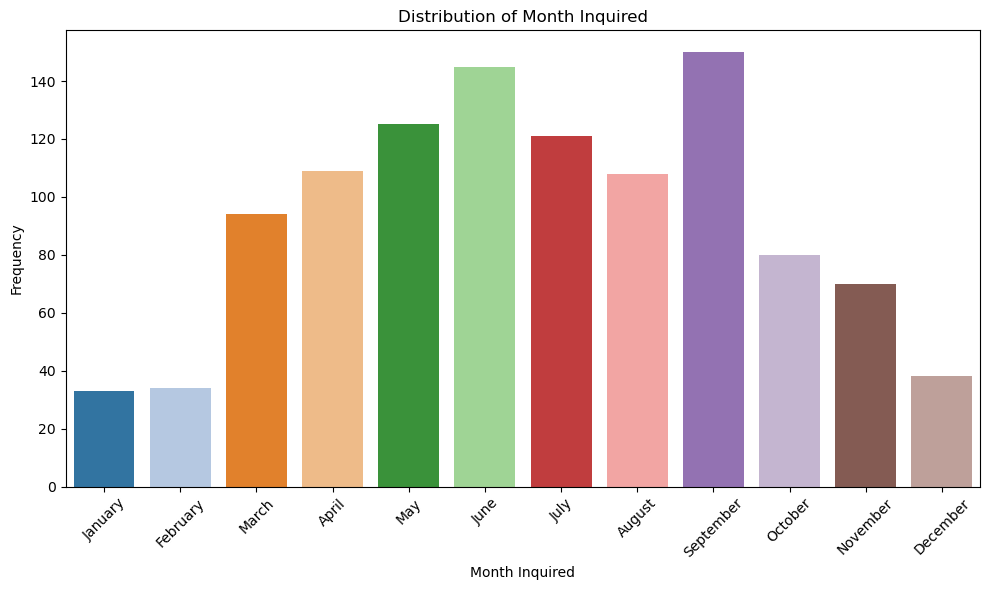

'"\nExplanation of abover code and what each line does:\n\'plt.figure(figsize=(10, 6))\'\n    - Creates a new firgure for the plot\n    - figure() is a function in matplotlib which initializes a new figure, essentially creating a blank cnavas for a plot\n    - figsize set the width and height of the figure in inches, (10, 6) means 10 inches wide and 6 inches tall\n    \n\'sns.countplot(x=\'Month_Inquired\', data=df, palette=\'tab10\')\n    - sns.countplot() is a Seaborn function that creates a count plot, essentially a bar plot that shows represents the couny of\n      each unique value in a categorical variable.\n    - x=\'Month_Inquired\' specifes that \'Month_Inquired\' is the variable to plot on the x-axis\n    - data=df specifies that the data source is the df DataFrame\n    - palette=\'tab10\' sete a color scheme for the bars from seaborn, here is uses tab10 color scheme\n    \n\'plt.xticks(ticks=range(12), labels=[\'January\', \'February\', \'March\', \'April\', \'May\', \'June\

In [ ]:
# Data Distributions
# Visualizing Distributions
# Create a histogram for 'Month_Inquired'
# Helps visualize how data points are distributed
# Use matplotlib library and seaborn

# See how many applicant each month had in the date range and compare
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot with seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Month_Inquired', data=df, palette='tab20')

# Replace x-axis labels with month names
plt.xlabel('Month Inquired')
plt.ylabel('Frequency')
plt.title('Distribution of Month Inquired')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                                    'November', 'December'], rotation=45)

plt.tight_layout()
plt.show()

# We can see that most people inquire about the program in September
# Also, we can see that we see a rise of inquiries in summer, especially in June, right after spring semester ends
# We can also see that we see a decrease in inquiries in winter months as December, January, and February have the least inquiries
# There is a large jump in inquries from February to March

"""
Explanation of abover code and what each line does:
'plt.figure(figsize=(10, 6))'
    - Creates a new firgure for the plot
    - figure() is a function in matplotlib which initializes a new figure, essentially creating a blank cnavas for a plot
    - figsize set the width and height of the figure in inches, (10, 6) means 10 inches wide and 6 inches tall
    
'sns.countplot(x='Month_Inquired', data=df, palette='tab10')
    - sns.countplot() is a Seaborn function that creates a count plot, essentially a bar plot that shows represents the couny of
      each unique value in a categorical variable.
    - x='Month_Inquired' specifes that 'Month_Inquired' is the variable to plot on the x-axis
    - data=df specifies that the data source is the df DataFrame
    - palette='tab10' sete a color scheme for the bars from seaborn, here is uses tab10 color scheme
    
'plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
'November', 'December'], rotation=45)'
    - plt.xticks() customizes the tick lables on the x-axis
    - ticks=range(12) specifies tick locations, one for each month from 0 to 11. Here, it aligns each tick with the index of Month_Inquired
    - rotation=45 rotates the lables by 45 degrees which improves readability
    
'plt.tight_layout()'
    - Adjusts the padding of the figure to prevent overlapping elements
    - tight_layout() is a matplotlib function that adjusts subplot parameters to fit elements like titles, labels, and tick labels
      within the figure area. This ensures that none of the text or elements are cut off, especially if there are long labels.


"""


C:\Users\19787\AppData\Local\Temp\ipykernel_13112\307256660.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Program', data=df, palette='tab20c', order=sorted_programs)


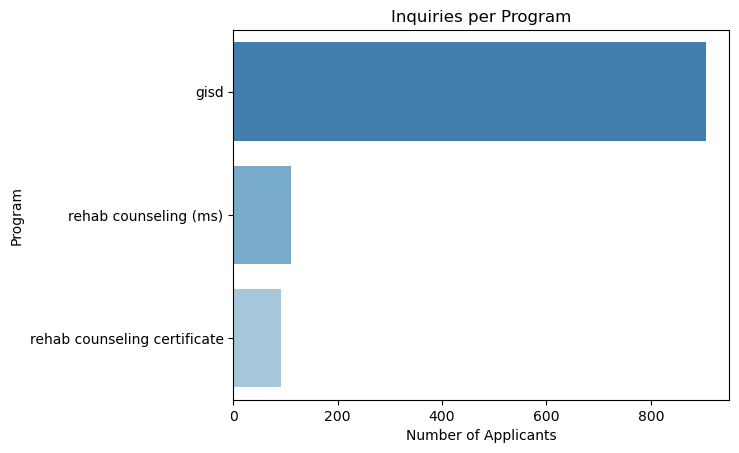

In [86]:
# Analyzing categorical varriables
# Frequency counts
# Visualize the frequancy of different values in 'Program' column
# Use a bar plot to see count of applicants per program
import seaborn as sns
import matplotlib.pyplot as plt

# This will make sure the categories are sorted from most to least
sorted_programs = df['Program'].value_counts().index

sns.countplot(y='Program', data=df, palette='tab20c', order=sorted_programs)
plt.title('Inquiries per Program')
plt.xlabel('Number of Applicants')
plt.show()

# We can notice that majority on inquiries are for the gisd program


C:\Users\19787\AppData\Local\Temp\ipykernel_13112\4164234951.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Degree', data=df, palette='gist_gray', order=sorted_degrees)


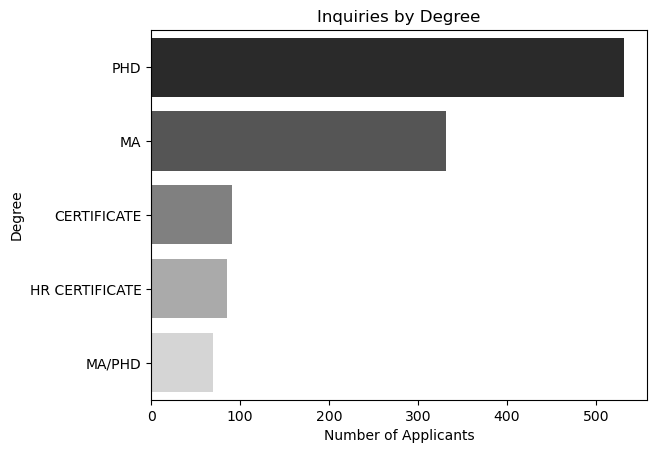

In [ ]:
# Do the same as above for the 'Degree' column
import seaborn as sns
import matplotlib.pyplot as plt

# This will make sure the categories are sorted from most to least
sorted_degrees = df['Degree'].value_counts().index

sns.color_palette(palette='gist_gray')
sns.countplot(y='Degree', data=df, palette='gist_gray', order=sorted_degrees)
plt.title('Inquiries by Degree')
plt.xlabel('Number of Applicants')
plt.show()

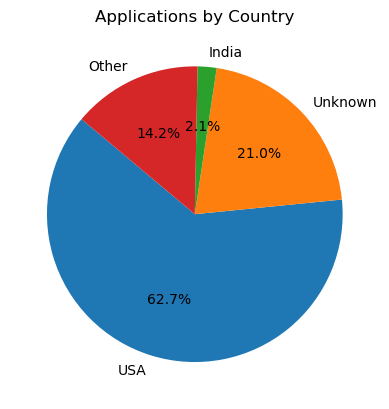

'\nExplanation of above code: and what each line does:\n\'top_countries = country_counts.loc[country_counts.index.isin([\'USA\', \'Unknown\'])].append(country_counts.drop([\'USA\', \'Unknown\']).head(3))\'Cereals.csv\n    - Selects rows in country_counts where the index (country name) is either "USA" or "Unknown."\n    - .loc[] is a pandas method that accesses rows and columns by labels or boolean indexing\n    - .index accesses the index labels of the country_counts Series, which are the country names in this case\n    - .isin([\'USA\', \'Unknown\']) checks if each index value is in the list [\'USA\', \'Unknown\'], returning a boolean array\n    - .append(country_counts.drop([\'USA\', \'Unknown\']).head(1)) appends the top 2 countries (exclusing \'USA\' and \'Unknown\')\n            - .drop([\'USA\', \'Unknown\']) removes "USA" and "Unknown" from country_counts.\n            - head(3) selects top 3 entries after \'USA\' and \'Unknown\'\n\n\'other_count = country_counts.drop(top_countr

In [ ]:
# For a visual representation of location data, like 'Country', use a pie chart
# Since there are many countries and USA is the majority, onlt show USA, Unknown, 3 top countries after USA, and the rest as one
import matplotlib.pyplot as plt
import pandas as pd

# Get count of each country
country_counts = df['Country'].value_counts()

# Identify top countries after USA and Unkown
top_countries = country_counts.head(3)  
top_countries = top_countries[top_countries.index.isin(['USA', 'Unknown']) | (top_countries.index != 'USA')]

# Calculate sum of the rest of the countries
other_count = country_counts[~country_counts.index.isin(top_countries.index)].sum()

# Combine top countries with "Other"
final_counts = pd.concat([top_countries, pd.Series({'Other': other_count})])

# Plot the pie chart
final_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Applications by Country')
plt.ylabel('')
plt.show()

"""
Explanation of above code: and what each line does:

'top_countries = top_countries[top_countries.index.isin(['USA', 'Unknown']) | (top_countries.index != 'USA')]'
    - country_counts.head(3): Selects the first three entries (the three most frequent countries). This selection will initially include "USA" and "Unknown" if 
      they're among the top three.
        - .head(3): Returns the first three rows of the country_counts Series.
        
'top_countries[top_countries.index.isin(['USA', 'Unknown']) | (top_countries.index != 'USA')]' 
    - Filters top_countries to keep entries for "USA," "Unknown," and the remaining top entries after "USA."
    - .index: Retrieves the index of top_countries, which contains the country names.
    - .isin(['USA', 'Unknown']): Creates a boolean array where True marks rows with "USA" or "Unknown" in the index.
    - |: The bitwise OR operator, combining the conditions to retain "USA," "Unknown," and any countries that aren't "USA."

'country_counts[~country_counts.index.isin(top_countries.index)]'
    - Selects rows in country_counts that are not in top_countries. The ~ symbol negates the boolean array from .isin().
    - .sum() sums the remaining counts to get total as other_count
    
'final_counts = pd.concat([top_countries, pd.Series({'Other': other_count})])'
    - pd.Series({'Other': other_count}) creates a new Series with one entry where "Other" is the index and other_count is the value
    - pd.concat([top_countries, pd.Series({'Other': other_count})]) concatenates top_countries and the new "Other" Series into a single Series
    
'final_counts.plot.pie(autopct='%1.1f%%', startangle=140)'
    - Plots the final counts as a pie chart
    - autopct='%1.1f%%' displays percentage labels on each slice, formatted to one decimal place
    - startangle=140 rotates the starting angle of the pie chart by 140 degrees for better orientation and appearance.

Definitions of functions used above:

.loc[]: A versatile accessor in pandas for selecting data by label or condition. Used here for label-based filtering (boolean indexing).

.index: Provides the index (or labels) of a Series or DataFrame. Here, .index is used to filter countries by name.

.isin(): Checks if values in a Series or DataFrame are present in a specified list, returning a boolean array. Useful for filtering data based on specific values.

~: A bitwise NOT operator, used here to negate the boolean array created by .isin(). It's useful for selecting all items that do not meet a condition.

.sum(): Returns the sum of values in a Series, which is useful for aggregating counts.

pd.concat(): Combines multiple pandas objects (Series or DataFrames) along a specified axis (default is rows). Here, it's used to merge top_countries and the "Other" 
category.

.plot.pie(): A method in pandas for creating pie charts from a Series or DataFrame. Pie charts are useful for showing proportions among categories.
"""





In [ ]:
# Relationship Analysis
# Cross-Tabulation
# cross-tabulations help analyze the relationship between two categorical values
# here, 'Program' and 'Degree' are compared
import pandas as pd
pd.crosstab(df['Program'], df['Degree'])
df


Degree,CERTIFICATE,HR CERTIFICATE,MA,MA/PHD,PHD
Program,,,,,
gisd,0,85,220,69,531
rehab counseling (ms),0,0,110,0,0
rehab counseling certificate,91,0,1,0,0


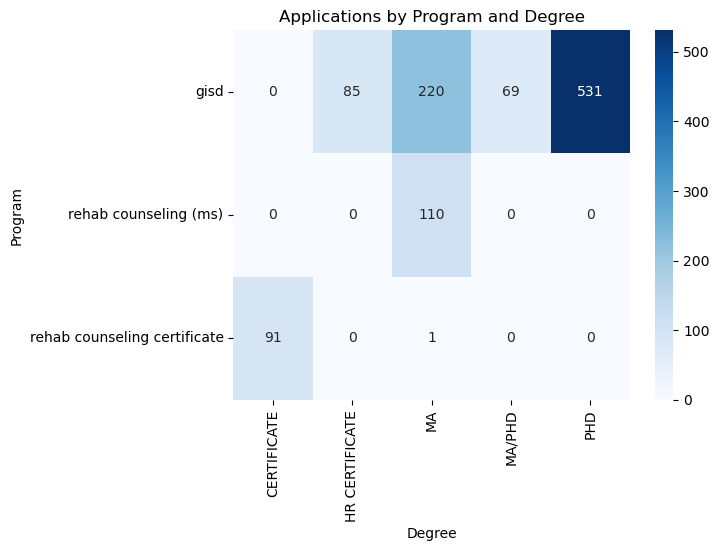

In [ ]:
# Heatmap visualization
# Use a heatmap to visualize above table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.heatmap(pd.crosstab(df['Program'], df['Degree']), annot=True, fmt="d", cmap='Blues')
plt.title('Applications by Program and Degree')
plt.show()

# We can see that most people who inquire about gisd are inquiring about the PHD Degree


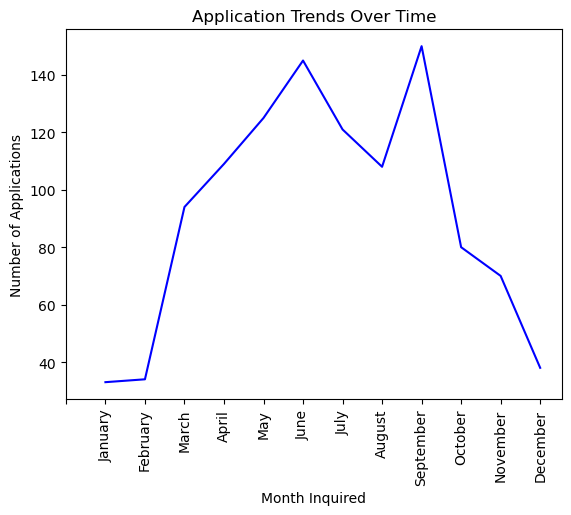

In [ ]:
# Time series analysis
# Show which months thoughout the year have the highest inquiries using a line plot

df.groupby('Month_Inquired').size().plot(kind='line', color='blue')
plt.xlabel('Month Inquired')
plt.ylabel('Number of Applications')
plt.title('Application Trends Over Time')
plt.xticks(ticks=range(13), labels=[' ', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                                    'November', 'December'], rotation=90)
plt.show()

# Application rates increase beginning of summer, spike in september, and steep decline in winter months


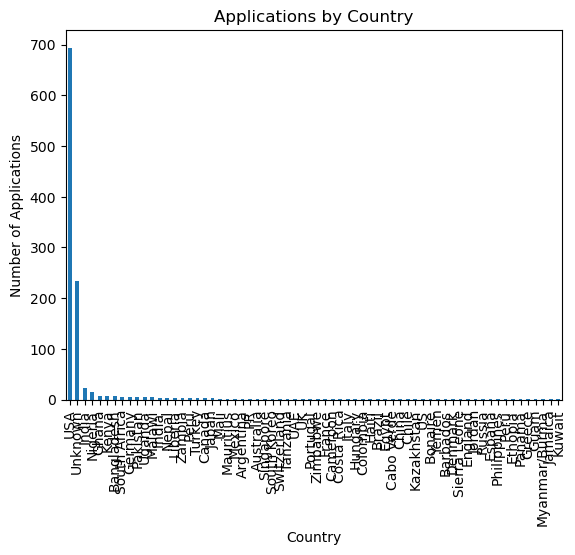

In [ ]:
# Geographic Analysis
# visualize applications by location, plot the count by Country or State on a map
# Libraries like geopandas or mapping in Tableau can help

country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Applications')
plt.title('Applications by Country')
plt.show()

# We can easily see that a large majority of inquiries come from the USA


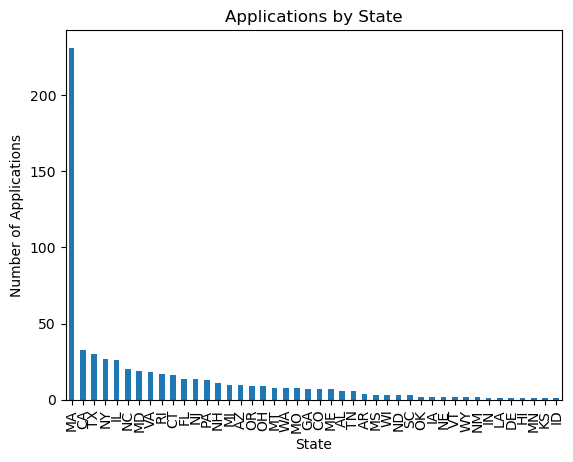

In [133]:
# Domestic Geographical Analysis (USA only)


df_temp = df.copy()

# List of all U.S. states
us_states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", 
    "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
    "LA", "ME", "MD", "MA", "MI", "MN", "MS", 
    "MO", "MT", "NE", "NV", "NH", "NJ", "NM", 
    "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
    "RI", "SC", "SD", "TN", "TX", "UT", "VT", 
    "VA", "WA", "WV", "WI", "WY"
]


# Filter 'States' column to include only U.S. states
df_temp['USA_States'] = df_temp['State'].apply(lambda x: x if x in us_states else None)

# If you want to remove rows where the 'States' column doesn't match a U.S. state
# df = df[df['States'].isin(us_states)]

country_counts = df_temp['USA_States'].value_counts()
country_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.title('Applications by State')
plt.show()



In [144]:
# Statistical Analysis
# t-test
# conduct a 2-sample t-test using two groups one using the 'gisd' program and the other using the 'rehab counseling (ms)' program
# test whether there is a statistically significant difference in the average inquiry month betwen the two groups
from scipy.stats import ttest_ind

group1 = df[df['Program'] == 'gisd']['Month_Inquired']
group2 = df[df['Program'] == 'rehab counseling (ms)']['Month_Inquired']
t_stat, p_val = ttest_ind(group1, group2)
print("t-statistic: ", t_stat)
print("p-value" , p_val)

# this t-test calculates the mean month for each group 
# since the p-value is way below 0.05, that means there is a significant difference between the two programs
# null hypothesis is rejected since there is a signifcant difference

"""
If t_stat is large and positive, it suggests that applicants for the "gisd" program inquired, on average, later in the year compared 
to the "rehab counseling (ms)" program.

If t_stat is large and negative, it suggests that applicants for the "rehab counseling (ms)" program inquired, on average, later in the 
year than the "gisd" program.

If t_stat is close to zero, it suggests that there is little to no difference in the average inquiry month between the two programs.
"""

t-statistic:  2.971341725153831
p-value 0.0030350374075763025


'\nIf t_stat is large and positive, it suggests that applicants for the "gisd" program inquired, on average, later in the year compared \nto the "rehab counseling (ms)" program.\n\nIf t_stat is large and negative, it suggests that applicants for the "rehab counseling (ms)" program inquired, on average, later in the \nyear than the "gisd" program.\n\nIf t_stat is close to zero, it suggests that there is little to no difference in the average inquiry month between the two programs.\n'

In [ ]:
# T-test for 'MA' and 'PHD' degrees
# conduct a 2-sample t-test using 'MA' and 'PHD' from 'Degree' column
# test whether there is a statistically significant difference in the average inquiry month between the two groups
# In other words, compare the averages "on average what month has highest inquiries about MA degree and same for PHD degree"
from scipy.stats import ttest_ind

group1 = df[df['Degree'] == 'MA']['Month_Inquired']
group2 = df[df['Degree'] == 'PHD']['Month_Inquired']
t_stat, p_val = ttest_ind(group1, group2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

"""
The negative t-statistic (-3.58) indicates that the mean inquiry month for the MA degree group is lower than the mean inquiry month 
for the PHD degree group. In other words, on average, MA applicants tended to inquire earlier in the year compared to PHD applicants.
Since the absolute value of the t-statistic is relatively large, it suggests a noteable difference between the two means.

The p-value of 0.00035 is very low, well below common significance levels like 0.05 or even 0.01.
This means that the difference in average inquiry months between MA and PHD applicants is statistically significant. 
There is strong evidence that this difference is not due to random chance.
"""

t-statistic:  -3.5861331196658677
p-value:  0.00035454046869140717


In [ ]:
# ANOVA test
# compare the distribution of the Month_Inquired variable across the three different Degree groups: MA, PhD, and Certificate
# In other words, distribution on what months the degrees are being inquired in mostly
from scipy.stats import f_oneway
group1 = df[df['Degree'] == 'MA']['Month_Inquired']
group2 = df[df['Degree'] == 'PHD']['Month_Inquired']
group3 = df[df['Degree'] == 'CERTIFICATE']['Month_Inquired']
f_stat, p_val = f_oneway(group1, group2, group3)

print("f-statitsic: ", f_stat)
print("p-value: ", p_val)

"""
Explnation:
The ANOVA test calculates an F-statistic by comparing the variance between the groups (i.e., differences in Month_Inquired across the degrees)
with the variance within each group (i.e., individual variability within each degree).

A higher F-statistic indicates that the differences between groups are greater than would be expected by chance, suggesting at least one group's 
mean month of inquiry differs significantly from the others.

F-statistic (6.27): This value indicates the ratio of the variance between the groups to the variance within the groups. A higher F-statistic 
generally points to a greater degree of separation between group means.

P-value (0.00196): The p-value tells us how likely it is that we'd observe such an F-statistic if the null hypothesis were true (i.e., if all 
groups have the same average month of inquiry). A p-value of 0.00196 is much smaller than a typical significance level (0.05), which suggests that:
    - We can reject the null hypothesis with strong confidence.
    - There is a statistically significant difference in the average month of inquiry among at least one of the degrees (MA, PhD, Certificate).
    
This result suggests that applicants for the different degrees (MA, PhD, Certificate) are inquiring during significantly different months on average. 
For example, MA applicants might tend to inquire earlier or later in the year than PhD or Certificate applicants.
"""


f-statitsic:  6.2730985257890355
p-value:  0.0019654447128110365


In [148]:
# Chi Square Test
# Find if theres an association between the two categorical variables: 'Program' and 'Degree'
# Assumption: Categories should be independent, and expected frequencies should be >= 5
# Interpretation: A low p-value (< 0.05) suggests a significant association between the two variables
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Program'], df['Degree'])
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print("chi2: ", chi2)
print("p_val: ", p_val)
print("dof: ", dof)
print("expected: ", expected)

"""
The chi-square statistic (1372.64) is very high and the p-value (4.6472754800649215e-291) is very low, this means there is a strong association between the variables
in 'Program' and 'Degree'.
    - This could mean that the degree types are not evenly distributed across programs as they would be under independence
    
The p-value here, pretty much 0, indicates very strong evidence against the null hypothesis (independence), suggesting that 'Program' and 'Degree' are indeed associated

The dof (8), comes from having 3 unique variables in 'Program' and 5 unqique variables in 'Degree'. It is calculated like this:
    - (3 - 1) x (5 - 1) = 8
    
The expected counts are relatively different from the observed counts in your data, especially in certain categories. These discrepancies contribute to the large 
chi-square statistic.
"""


chi2:  1372.6452785399795
p_val:  4.6472754800649215e-291
dof:  8
expected:  [[ 74.39476061  69.48961156 270.60072267  56.40921409 434.10569106]
 [  9.04245709   8.44625113  32.89069557   6.85636856  52.76422764]
 [  7.56278229   7.06413731  27.50858175   5.73441734  44.1300813 ]]


"\nThe chi-square statistic (1372.64) is very high and the p-value (4.6472754800649215e-291) is very low, this means there is a strong association between the variables\nin 'Program' and 'Degree'.\n    - This could mean that the degree types are not evenly distributed across programs as they would be under independence\n    \nThe p-value here, pretty much 0, indicates very strong evidence against the null hypothesis (independence), suggesting that 'Program' and 'Degree' are indeed associated\n\nThe dof (8), comes from having 3 unique variables in 'Program' and 5 unqique variables in 'Degree'. It is calculated like this:\n    - (3 - 1) x (5 - 1) = 8\n    \nThe expected counts are relatively different from the observed counts in your data, especially in certain categories. These discrepancies contribute to the large \nchi-square statistic.\n"

In [ ]:
# Correlation Analysis
# measure the strength and direction between 'Year_Inquired' and 'Month_Inquired'
correlation_matrix = df[['Year_Inquired', 'Month_Inquired']].corr()
print(correlation_matrix)

"""
The correlation matrix calculated shows the correlation values between Year_Inquired and Month_Inquired. 

Here's what the results mean:
    Correlation between Year_Inquired and Month_Inquired (-0.191806):
        - This value is approximately -0.19 which suggests a weak negative correaltion
        - A negative correlation of -0.19 means that as the Year_Inquired increases, there is a slight tendency for Month_Inquired to decrease. 
        - However, since the value is close to 0, the linear relationship between these two variables is not strong.
        
        - The negative correlation here (-0.19) indicates that inquiries slightly tend to occur in earlier months of the year in 2021 compared to 2020.
            - However, because the correlation is weak (close to 0), this trend is not strong. Essentially, while there's a minor tendency, there isn't a 
              significant or consistent pattern over these two years.
              
This test and information isn't too helpful as there are only two different years in the 'Year_Inquired' column.
"""

                Year_Inquired  Month_Inquired
Year_Inquired        1.000000       -0.191806
Month_Inquired      -0.191806        1.000000


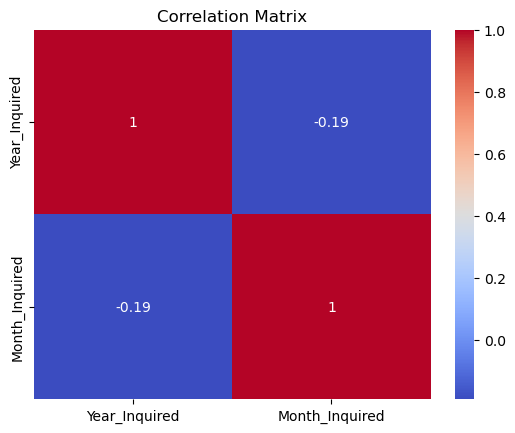

In [154]:
# Heatmap of above correlation analysis
corr_matrix = df[['Year_Inquired', 'Month_Inquired']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.0, 'Applicant overtime (2020-2021)')

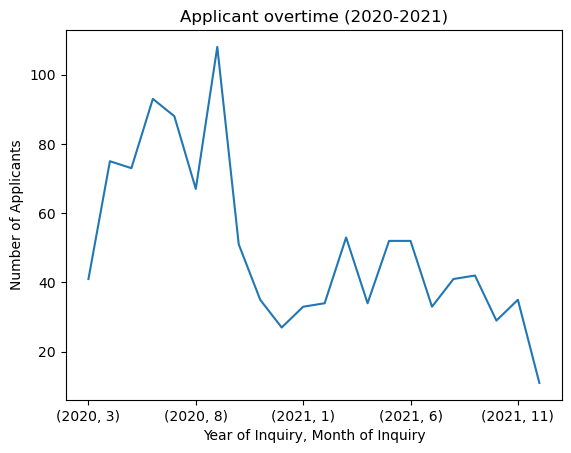

In [ ]:
# Trend Analysis
# Analyze trends overtime to show patterns like seasonal changes or declines
monthly_counts = df.groupby(['Year_Inquired', 'Month_Inquired']).size()
monthly_counts.plot(kind='line')
plt.xlabel("Year of Inquiry, Month of Inquiry")
plt.ylabel("Number of Applicants")
plt.title("Applicant overtime (2020-2021)")

# We can see a sharp decline towards the end of 2020, possibly because of the rise of the pandemic and things taking a pause.
# Low amount of inquiries at end of 2021 probably because of weak or low marketing during that time. Maybe becasue of the pandemic

"""
df.groupby(['Year_Inquired', 'Month_Inquired']): This groups the DataFrame by unique combinations of Year_Inquired and Month_Inquired. 
This will create groups for each year and month pair (e.g., January 2020, February 2020, etc.).

.size(): After grouping, .size() counts the number of inquiries in each unique (Year_Inquired, Month_Inquired) group. This results in a series where each 
pair of Year_Inquired and Month_Inquired is an index, and the value is the count of inquiries for that pair.
"""

<Axes: xlabel='Month_Inquired'>

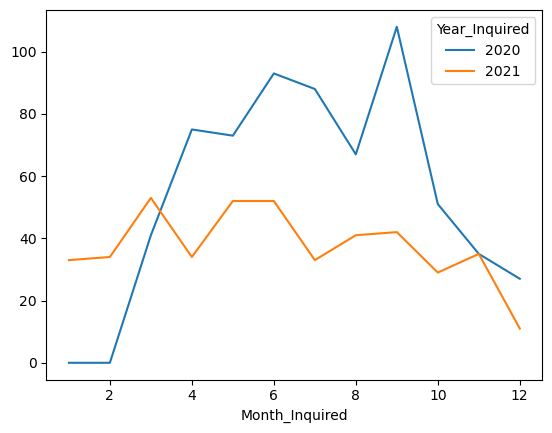

In [173]:
contingency_table = pd.crosstab(df['Month_Inquired'], df['Year_Inquired'])
contingency_table.plot(kind='line')